# Rohaan Advani - N19682109

# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  This lab uses the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Each row in the dataset it not a single house -- it corresponds to the average information about homes in a single single [census track](https://en.wikipedia.org/wiki/Census_tract).

In the lab, you will complete all the code marked `TODO`.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [1]:
import pandas as pd
import numpy as np
colnames =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', names=colnames, delim_whitespace=True)

Display the first six rows of the data frame

In [2]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [3]:
r, c = df.shape
print('Shape of data: '+ str(df.shape))
print('num samples='+str(r)+', num attributes='+str(c))

Shape of data: (506, 14)
num samples=506, num attributes=14


Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [4]:
y = df['PRICE'].to_numpy()
print(y)
print(type(y))

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!). Print and label your results. Create print statements of the form:

`The mean house price is xx.yy thousands of dollars.`

`Only x.y percent are above $40k`


In [5]:
print('The mean house price is '+str(np.mean(y))+' thousands of dollars.')
print('Only '+str(np.mean(y>40)*100)+' percent are above $40k.')

The mean house price is 22.532806324110677 thousands of dollars.
Only 6.126482213438735 percent are above $40k.


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each census track.

In [7]:
x = df['RM'].to_numpy()

Create a scatter plot of the price vs. the `RM` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

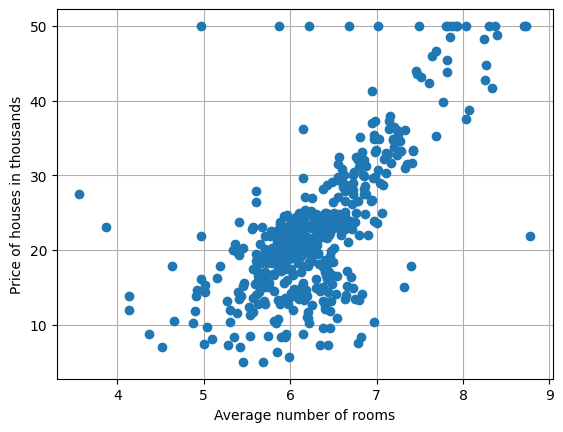

In [8]:
plt.plot(x,y,'o')
plt.xlabel('Average number of rooms')
plt.ylabel('Price of houses in thousands')
plt.grid(True)

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [9]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    xm = np.mean(x)
    ym = np.mean(y)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    yhat=beta0+beta1*x
    loss = np.sum((y-yhat)**2)
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [10]:
beta0, beta1, loss = fit_linear(x, y)
print('beta0='+str(beta0)+' beta1='+str(beta1)+' loss='+str(loss))

beta0=-34.67062077643857 beta1=9.10210898118031 loss=22061.879196211798


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

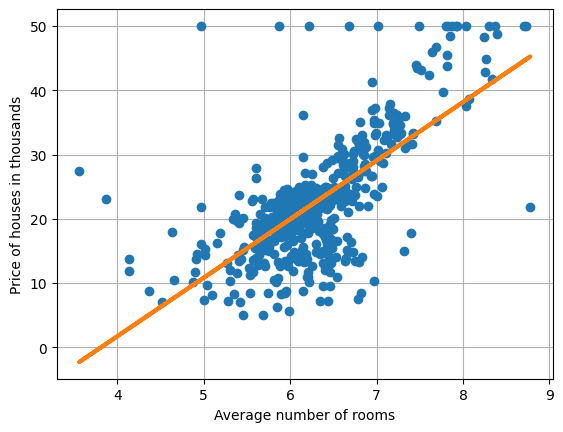

In [11]:
ypred = beta1*x + beta0

plt.plot(x,y,'o')                    # Plot the data points
plt.plot(x,ypred,'-',linewidth=3)  # Plot the regression line (the predicted values)
plt.xlabel('Average number of rooms')
plt.ylabel('Price of houses in thousands')
plt.grid(True)

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    CRIM        XXXXX
    ZN          XXXXX
    INDUS       XXXXX
    ...         ...

You will need to write a loop. One option is to loop over the list of colunm names in the dataframe `df`.

What variable does the best job predicting house price?

In [12]:
df2 = pd.DataFrame({'Attribute': [], 'Loss': []})
for i in colnames:
  if i != 'PRICE':
    x = df[i].to_numpy()
    xm = np.mean(x)
    ym = np.mean(y)
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    yhat=beta0+beta1*x
    loss = np.sum((y-yhat)**2)
    df2.loc[len(df2.index)] = [i, loss]
print(df2)
print('Minimum Loss: ', df2['Loss'].min())
print('The variable that does the best job at predictive house price is: ', df2['Attribute'][df2['Loss'].argmin()])

   Attribute          Loss
0       CRIM  36275.512356
1         ZN  37166.558224
2      INDUS  32721.108150
3       CHAS  41404.216144
4        NOX  34916.169908
5         RM  22061.879196
6        AGE  36646.534350
7        DIS  40048.048843
8        RAD  36495.154812
9        TAX  33338.961320
10   PTRATIO  31702.013207
11         B  37966.409179
12     LSTAT  19472.381418
Minimum Loss:  19472.38141832644
The variable that does the best job at predictive house price is:  LSTAT


**TODO:** Describe in words the meaning of the most predictive variable for housing price. You might need to do some Googling to figure out what it means.

According to the above loss data generated, the LSTAT Attribute having the least loss is the most predictive variable for housing price. Here LSTAT refers to % lower status of the population. This infers to the socioeconomic status of the people.

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$. This idea was suggested by a student in our class.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,1)` and $\beta_1$ is in `np.arange(-10,10,.1)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [13]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    min_loss = float('inf')
    beta0 = 51
    beta1 = 11
    for i in np.arange(-50, 50, 1):
      for j in np.arange(-10, 10, 0.1):
        yhat=i+j*x
        loss = np.sum((y-yhat)**2)
        if loss < min_loss:
          min_loss = loss
          beta0 = i
          beta1 = j
    return beta0, beta1, min_loss

Compare the output of `fit_approx` and `fit_linear` with `y` being `PRICE` and `x` being the `LSAT` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

fit_linear: beta0=34.5538408793831 beta1=-0.9500493537579907 loss=19472.38141832644
fit_approx: beta0=34 beta1=-0.9000000000000323 loss=19540.082422999883


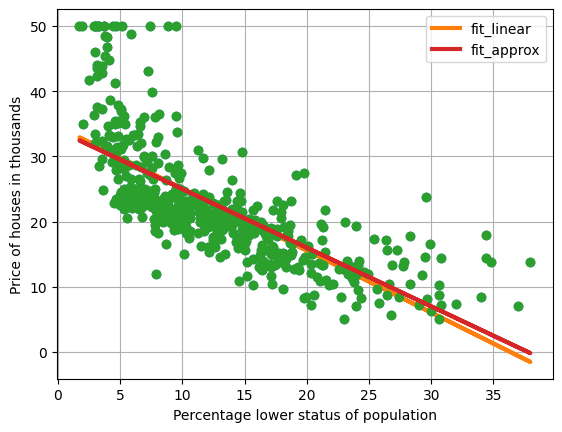

In [14]:
x = df['LSTAT'].to_numpy()

beta0, beta1, loss = fit_linear(x, y)
print('fit_linear: beta0='+str(beta0)+' beta1='+str(beta1)+' loss='+str(loss))
ypred = beta1*x + beta0
plt.plot(x,y,'o')                    # Plot the data points
plt.plot(x,ypred,'-',linewidth=3,label='fit_linear')  # Plot the regression line (the predicted values)

beta0, beta1, loss = fit_approx(x, y)
print('fit_approx: beta0='+str(beta0)+' beta1='+str(beta1)+' loss='+str(loss))
ypred = beta1*x + beta0
plt.plot(x,y,'o')                    # Plot the data points
plt.plot(x,ypred,'-',linewidth=3,label='fit_approx')  # Plot the regression line (the predicted values)

plt.xlabel('Percentage lower status of population')
plt.ylabel('Price of houses in thousands')
plt.legend()
plt.grid(True)

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [15]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """
    min_loss = float('inf')
    beta0 = 51
    beta1 = 11
    for i in np.arange(-50, 50, 1):
      for j in np.arange(-10, 10, 0.1):
        yhat=i+j*x
        loss = np.sum(abs(y-yhat))
        if loss < min_loss:
          min_loss = loss
          beta0 = i
          beta1 = j
    return beta0, beta1, min_loss

In [16]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    min_loss = float('inf')
    beta0 = 51
    beta1 = 11
    for i in np.arange(-50, 50, 1):
      for j in np.arange(-10, 10, 0.1):
        yhat=i+j*x
        loss = np.max(abs(y-yhat))
        if loss < min_loss:
          min_loss = loss
          beta0 = i
          beta1 = j
    return beta0, beta1, min_loss

Use your algorithm to obtain 3 different linear fits for `PRICE` with predictor variable `LSTAT`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

fit_approx: beta0=34 beta1=-0.9000000000000323 loss=19540.082422999883
fit_approx_l1: beta0=31 beta1=-0.8000000000000327 loss=2163.5600000000027
fit_approx_max: beta0=37 beta1=-0.700000000000033 loss=19.671000000000316


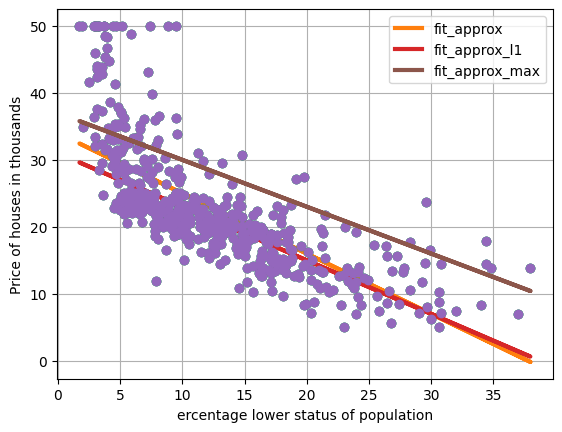

In [17]:
beta0, beta1, loss = fit_approx(x, y)
print('fit_approx: beta0='+str(beta0)+' beta1='+str(beta1)+' loss='+str(loss))
ypred = beta1*x + beta0
plt.plot(x,y,'o')                    # Plot the data points
plt.plot(x,ypred,'-',linewidth=3,label='fit_approx')  # Plot the regression line (the predicted values)

beta0, beta1, loss = fit_approx_l1(x, y)
print('fit_approx_l1: beta0='+str(beta0)+' beta1='+str(beta1)+' loss='+str(loss))
ypred = beta1*x + beta0
plt.plot(x,y,'o')                    # Plot the data points
plt.plot(x,ypred,'-',linewidth=3,label='fit_approx_l1')  # Plot the regression line (the predicted values)

beta0, beta1, loss = fit_approx_max(x, y)
print('fit_approx_max: beta0='+str(beta0)+' beta1='+str(beta1)+' loss='+str(loss))
ypred = beta1*x + beta0
plt.plot(x,y,'o')                    # Plot the data points
plt.plot(x,ypred,'-',linewidth=3,label='fit_approx_max')  # Plot the regression line (the predicted values)

plt.xlabel('ercentage lower status of population')
plt.ylabel('Price of houses in thousands')
plt.legend()
plt.grid(True)